In [123]:
import pandas as pd
import matplotlib.pyplot as plt
#I synchronized the spelling of districts in two sheets like somewhere it was used Mirpurkhas and somehere used MirpurKhaas.
#I did work for the betterment of header field of the table, made a separate column for like electricity with and electricity without.
#Added the column of total number of students for particular district to find correlation between facilities and total number of students in a district
#removed the irrelevant sindh row from the dataset, because we are working on the urban level analysis

In [124]:
enrollmentpath="sindh-school-enrollment-stats.csv"
facilitiespath="facilities.csv"

In [125]:
enrollment=pd.read_csv(enrollmentpath)
facilities=pd.read_csv(facilitiespath)

In [126]:
r={'West Karchi':'West Karachi'}
enrollment= enrollment.replace(r, regex=True)


In [127]:
replacement_dict = {
    'Mirpurkhas': 'Mirpurkhaas',
    'South  Karachi': 'South Karachi',
    'Jcobabad': 'Jacobad',
    'Khairpur': 'Khairpur Mirs',
    'Naushero Feroze': 'Naushero Feroz',
    'Sukkur': 'Sukkhur',
    'Matiari': 'Matira',
    'Tando Allah Yar': 'Tando Allah yar',
    'Kashmore@Kandhkot': 'Kashmore',
    'Kamber @ Shahdad Kot': 'Kamber Shahdadkot',
    'S. Banazeerabad': 'Shaheed Benazirabad'
}

facilities = facilities.replace(replacement_dict, regex=True)

enrollment.head()

,District,Location,School Type,Category,Composition,Number,Population,No/100000
0,Badin,Urban,Primary,INSTITUTIONS,TOTAL,168,"1,804,516",9.309976
1,Badin,Urban,Primary,INSTITUTIONS,MALE,30,"1,804,516",1.662496
2,Badin,Urban,Primary,INSTITUTIONS,FEMALE,27,"1,804,516",1.496246
3,Badin,Urban,Primary,INSTITUTIONS,MIXED,111,"1,804,516",6.151234
4,Badin,Urban,Primary,ENROLMENT,TOTAL,16446,"1,804,516",911.380115


In [128]:
newarr=enrollment["District"].unique()
print(newarr)

['Badin' 'Dadu' 'Hyderabad' 'Thatta' 'Jamshoro' 'Matira' 'Tando Allah yar'
 'Tando Muhammad Khan' 'Sujawal' 'Central Karachi' 'East Karachi'
 'South Karachi' 'West Karachi' 'Malir Karachi' 'Korangi Karachi'
 'Jacobad' 'Larkana' 'Shikarpur' 'Kashmore' 'Kamber Shahdadkot'
 'Khairpur Mirs' 'Sukkhur' 'Ghotki' 'Mirpurkhaas' 'Tharparkar' 'Umerkot'
 'Sanghar' 'Naushero Feroz' 'Shaheed Benazirabad']


In [129]:
newarr2=facilities["District"].unique()
print(newarr2)

['SINDH' 'Badin' 'Dadu' 'Hyderabad' 'Thatta' 'Mirpurkhaas' 'Tharparkar'
 'Sanghar' 'Central Karachi' 'East Karachi' 'South Karachi' 'West Karachi'
 'Malir Karachi' 'Korangi Karachi' 'Jacobad' 'Larkana' 'Shikarpur'
 'Khairpur Mirs' 'Naushero Feroz' 'Shaheed Benazirabad' 'Sukkhur' 'Ghotki'
 'Umerkot' 'Jamshoro' 'Matira' 'Tando Allah yar' 'Tando Muhammad Khan'
 'Sujawal' 'Kashmore' 'Kamber Shahdadkot']


In [130]:
for i in newarr2:
  if i not in newarr:
    print(i)

SINDH


In [131]:
facilities.head(5)

,District,No.of Schools,Electricity With,Electricity Without,Drinking Water With,Drinking Water Without,Washroom With,Washroom Without,Boundary Wall With,Boundary Wall Without,...,5 classroom,5+ classroom,Black Board,Student Chair,Desk/Bench,Teacher Table,Teacher Chair,Fans,Almirah,Computer
0,SINDH,42383,19148,23235,24255,18128,26905,15478,26024,16359,...,1791,3563,117845,219988,958832,103633,225739,170528,63831,10192
1,Badin,2934,875,2059,1298,1636,1595,1339,1447,1487,...,46,102,5391,8939,41894,5234,11164,6872,3520,1006
2,Dadu,1821,931,890,1001,820,1173,648,1223,598,...,68,154,4676,4453,43717,4280,9755,6633,1683,190
3,Hyderabad,868,634,234,604,264,737,131,747,121,...,75,202,5174,13548,40608,4673,11754,10502,2837,335
4,Thatta,1282,220,1062,272,1010,786,496,584,698,...,31,51,2422,4568,19808,2370,4027,1546,1748,249


In [132]:
facilities= facilities.iloc[1: , :]
facilities.head(2)

,District,No.of Schools,Electricity With,Electricity Without,Drinking Water With,Drinking Water Without,Washroom With,Washroom Without,Boundary Wall With,Boundary Wall Without,...,5 classroom,5+ classroom,Black Board,Student Chair,Desk/Bench,Teacher Table,Teacher Chair,Fans,Almirah,Computer
1,Badin,2934,875,2059,1298,1636,1595,1339,1447,1487,...,46,102,5391,8939,41894,5234,11164,6872,3520,1006
2,Dadu,1821,931,890,1001,820,1173,648,1223,598,...,68,154,4676,4453,43717,4280,9755,6633,1683,190


In [133]:
def helper_function(city,schooltype,enrollment):
  if city=="Sindh":
    return 200
  city_df = enrollment[enrollment['District'] == city]
  sum_by_composition = city_df.groupby('Composition')['Number'].sum()
  try:
    return (sum_by_composition[schooltype])
  except:
    return 0
facilities['No of Students in Female Schools'] = facilities['District'].apply(lambda x: helper_function(x,"FEMALE",enrollment))
facilities['No of Students in Male Schools'] = facilities['District'].apply(lambda x: helper_function(x,"MALE",enrollment))
facilities['No of Students in Mixed Schools'] = facilities['District'].apply(lambda x: helper_function(x,"MIXED",enrollment))


In [134]:
facilities.head(10)

,District,No.of Schools,Electricity With,Electricity Without,Drinking Water With,Drinking Water Without,Washroom With,Washroom Without,Boundary Wall With,Boundary Wall Without,...,Student Chair,Desk/Bench,Teacher Table,Teacher Chair,Fans,Almirah,Computer,No of Students in Female Schools,No of Students in Male Schools,No of Students in Mixed Schools
1,Badin,2934,875,2059,1298,1636,1595,1339,1447,1487,...,8939,41894,5234,11164,6872,3520,1006,132180,271960,4332
2,Dadu,1821,931,890,1001,820,1173,648,1223,598,...,4453,43717,4280,9755,6633,1683,190,182122,279256,2554
3,Hyderabad,868,634,234,604,264,737,131,747,121,...,13548,40608,4673,11754,10502,2837,335,167514,182812,1150
4,Thatta,1282,220,1062,272,1010,786,496,584,698,...,4568,19808,2370,4027,1546,1748,249,57444,103844,1738
5,Mirpurkhaas,1998,793,1205,936,1062,1293,705,971,1027,...,14515,34503,4669,10275,6717,3247,227,113448,224502,2934
6,Tharparkar,3439,550,2889,715,2724,1814,1625,1559,1880,...,10433,25682,4512,6906,2159,2909,236,108748,213794,5356
7,Sanghar,2955,830,2125,1665,1290,1776,1179,1724,1231,...,13420,50560,6541,14324,11578,3342,301,175026,339094,4600
8,Central Karachi,607,447,160,507,100,484,123,529,78,...,5883,53387,3229,7906,6870,2795,417,127294,93484,696
9,East Karachi,264,223,41,219,45,241,23,238,26,...,2910,24993,1600,3696,4151,1569,401,62882,47886,326
10,South Karachi,482,383,99,356,126,426,56,432,50,...,5257,42261,2979,6352,7079,2379,599,76814,54542,346


In [135]:

cols=["No of Students in Female Schools","No of Students in Male Schools","No of Students in Mixed Schools"]
facilities['Number of Students'] = facilities[cols].sum(axis=1)
facilities= facilities.drop(cols, axis=1)

In [136]:
cols=facilities.columns
comparison =["Number of Students"]
print(cols)

Index(['District', 'No.of Schools', 'Electricity With', 'Electricity Without',
       'Drinking Water With', 'Drinking Water Without', 'Washroom With',
       'Washroom Without', 'Boundary Wall With', 'Boundary Wall Without',
       'Laboratory With', 'Laboratory Without', 'Library With',
       'Library Without', 'Play Ground With', 'Play Ground Without',
       '0 classroom', '1 classroom', '2 classroom', '3 classroom',
       '4 classroom', '5 classroom', '5+ classroom', 'Black Board',
       'Student Chair', 'Desk/Bench', 'Teacher Table', 'Teacher Chair', 'Fans',
       'Almirah', 'Computer', 'Number of Students'],
      dtype='object')


Text(0, 0.5, 'Number of schools with electricity')

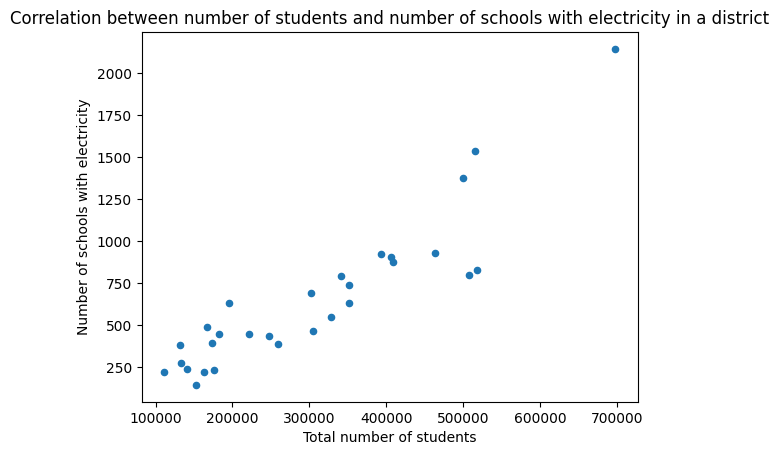

In [137]:
ax2 = facilities.plot.scatter(x="Number of Students",  y="Electricity With",  colormap='viridis');
plt.title("Correlation between number of students and number of schools with electricity in a district")
plt.xlabel("Total number of students")
plt.ylabel("Number of schools with electricity")

Text(0, 0.5, 'Number of schools with boundary walls')

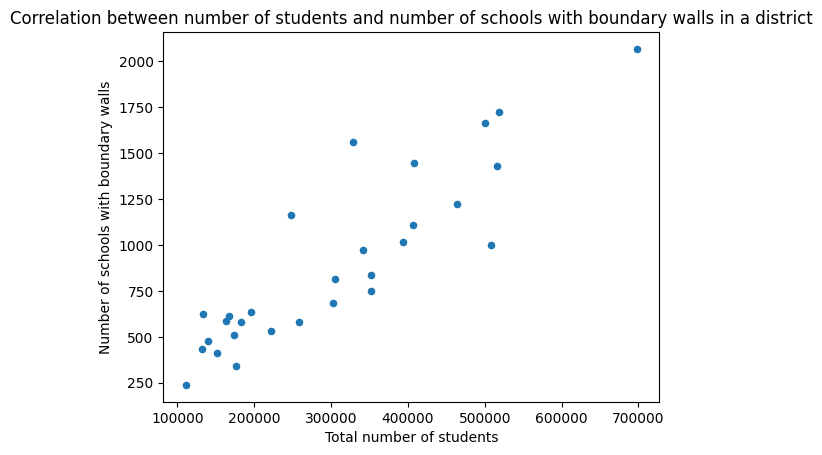

In [138]:
ax2 = facilities.plot.scatter(x="Number of Students",  y="Boundary Wall With",  colormap='viridis');
plt.title("Correlation between number of students and number of schools with boundary walls in a district")
plt.xlabel("Total number of students")
plt.ylabel("Number of schools with boundary walls")

Text(0, 0.5, 'Number of schools with drinking water facilities')

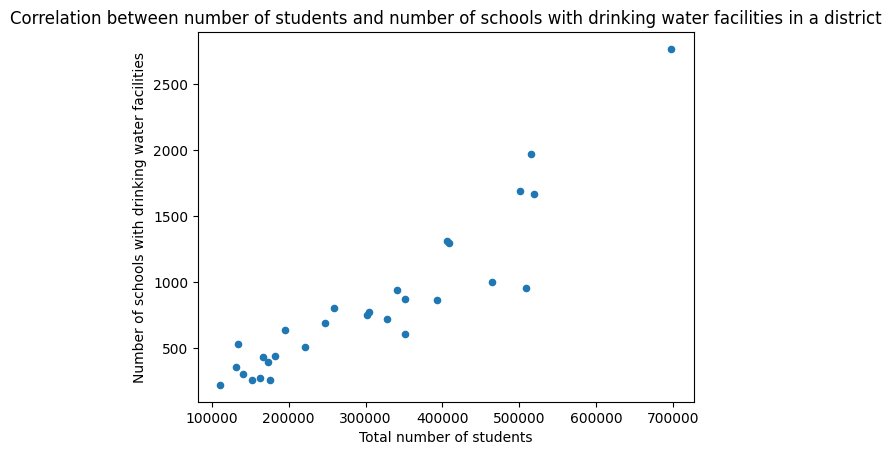

In [139]:
ax2 = facilities.plot.scatter(x="Number of Students",  y="Drinking Water With",  colormap='viridis');
plt.title("Correlation between number of students and number of schools with drinking water facilities in a district")
plt.xlabel("Total number of students")
plt.ylabel("Number of schools with drinking water facilities")

Index(['District', 'No.of Schools', 'Electricity With', 'Electricity Without',
       'Drinking Water With', 'Drinking Water Without', 'Washroom With',
       'Washroom Without', 'Boundary Wall With', 'Boundary Wall Without',
       'Laboratory With', 'Laboratory Without', 'Library With',
       'Library Without', 'Play Ground With', 'Play Ground Without',
       '0 classroom', '1 classroom', '2 classroom', '3 classroom',
       '4 classroom', '5 classroom', '5+ classroom', 'Black Board',
       'Student Chair', 'Desk/Bench', 'Teacher Table', 'Teacher Chair', 'Fans',
       'Almirah', 'Computer', 'Number of Students'],
      dtype='object')


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


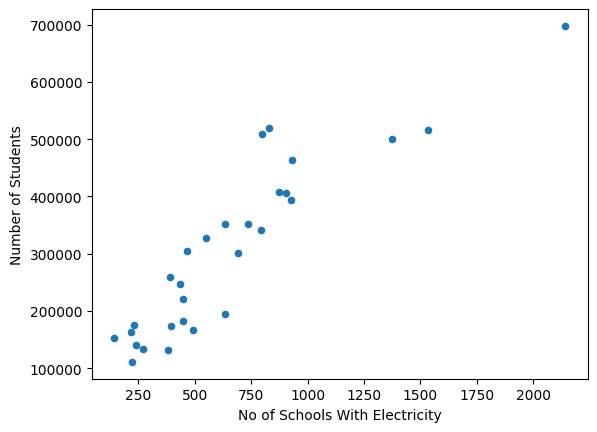

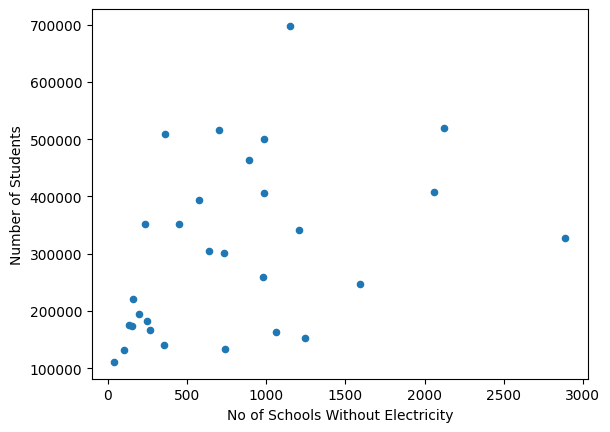

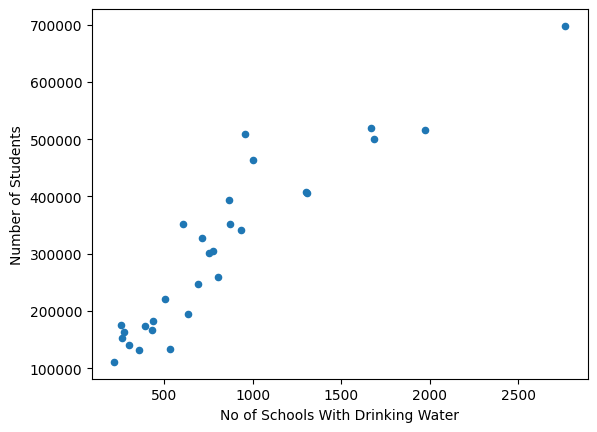

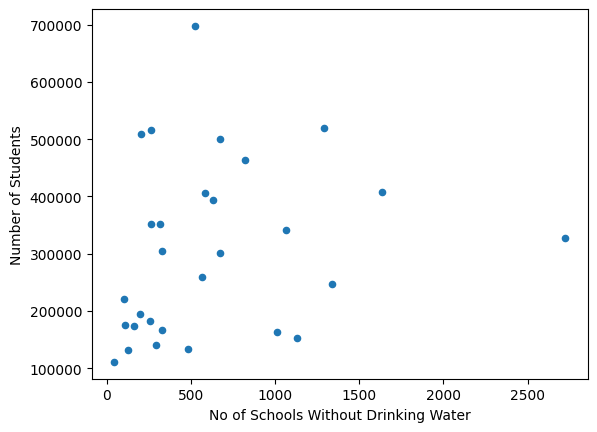

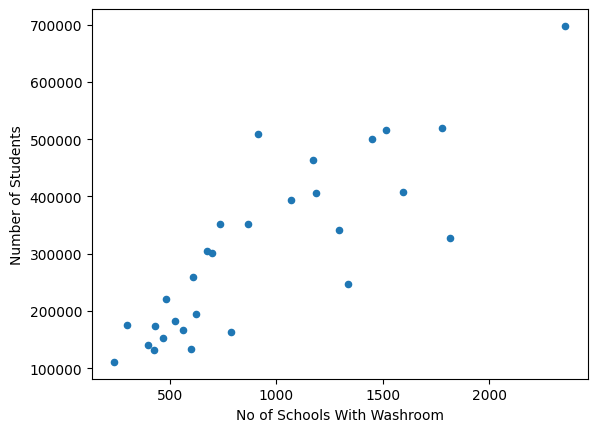

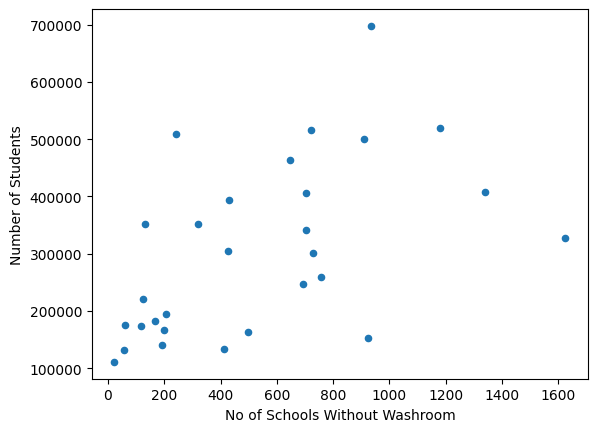

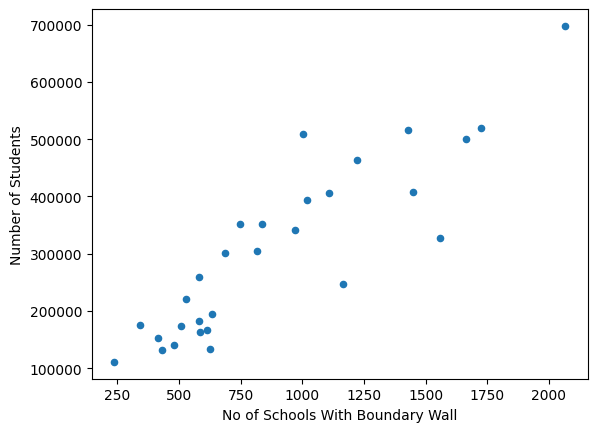

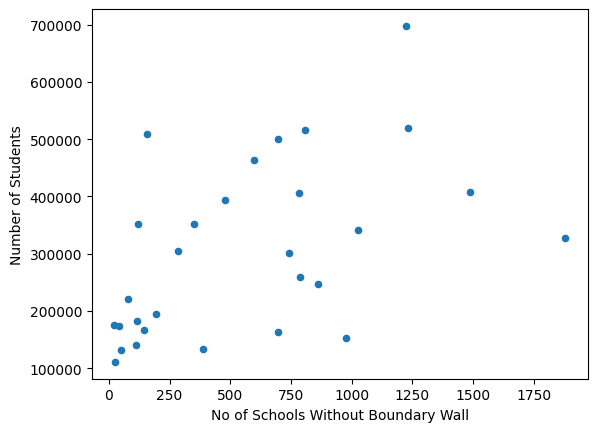

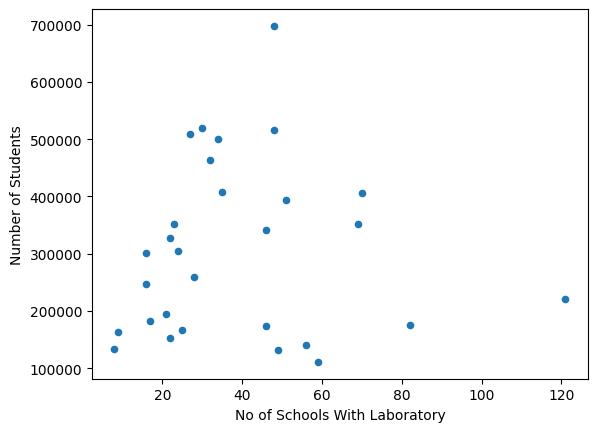

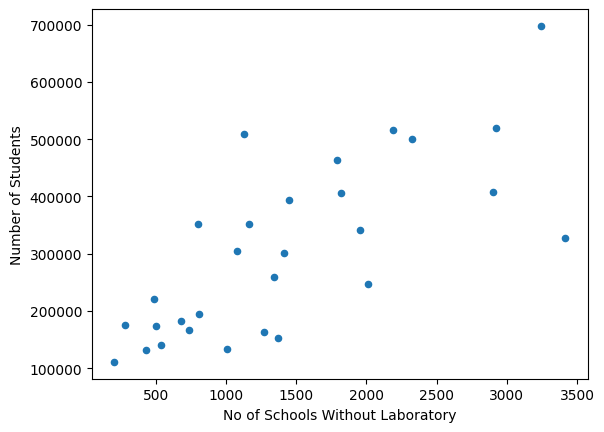

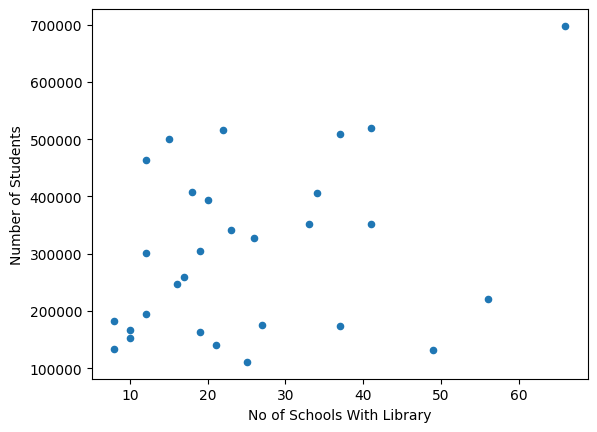

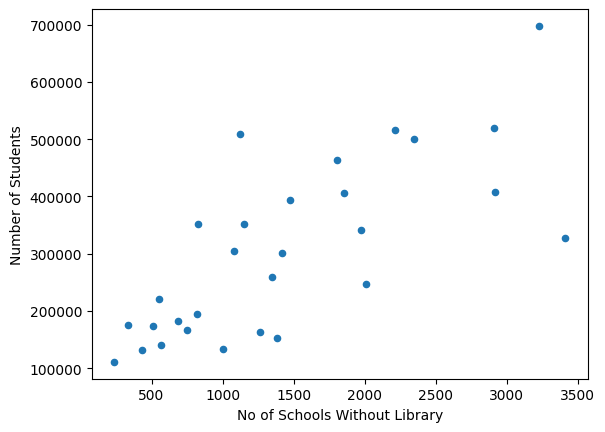

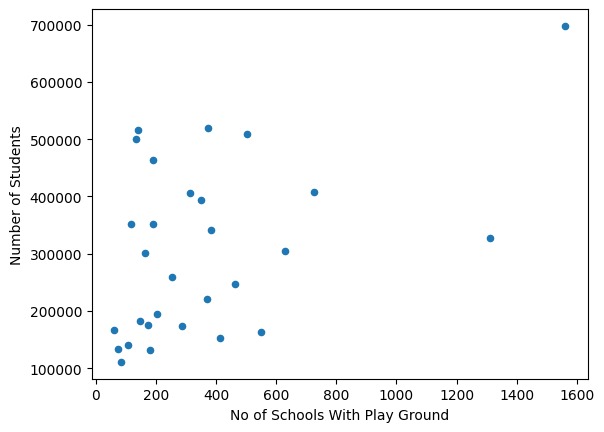

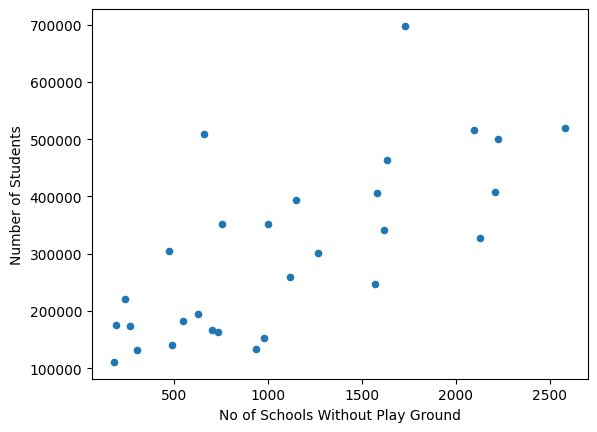

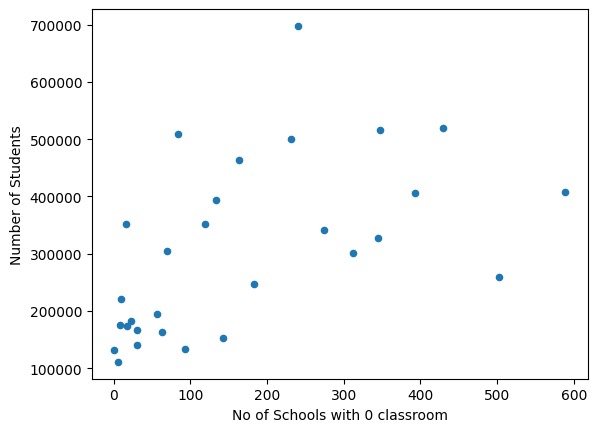

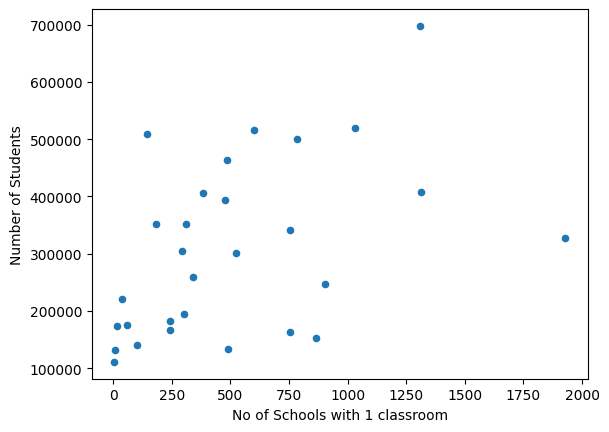

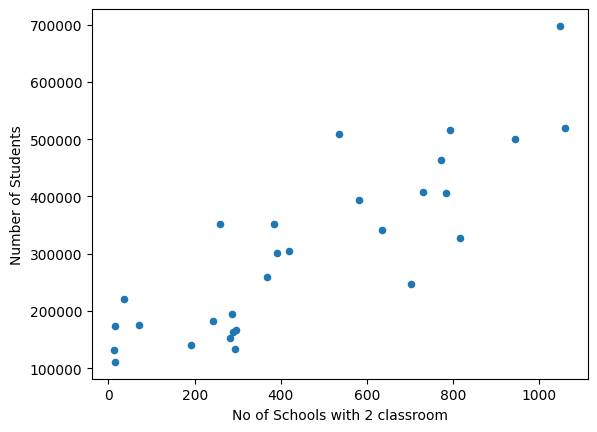

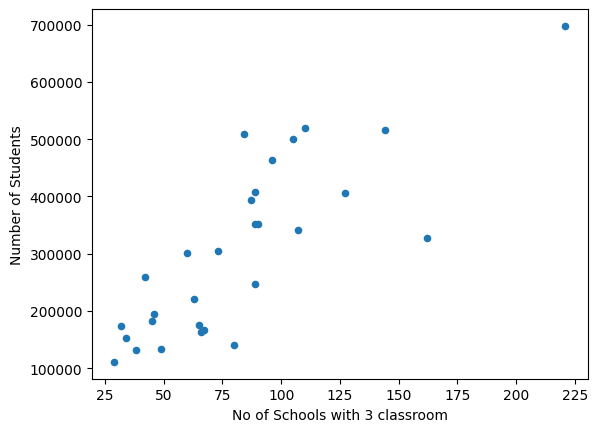

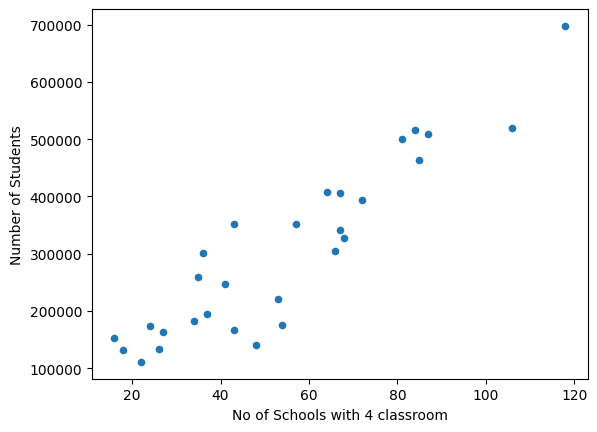

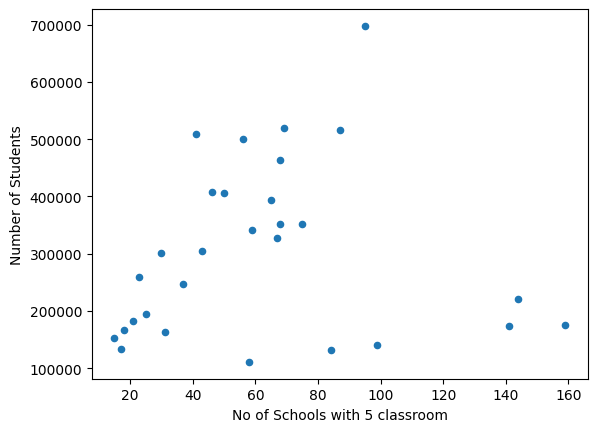

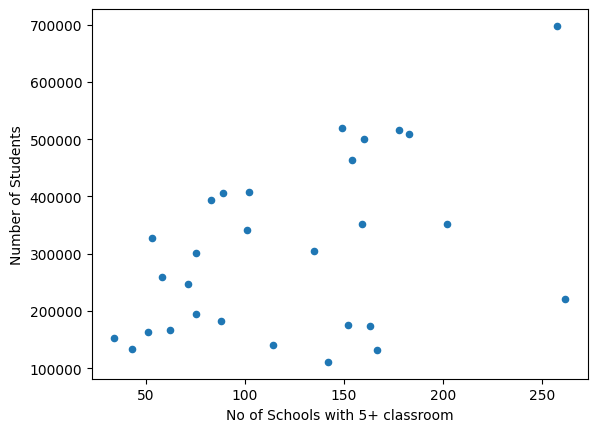

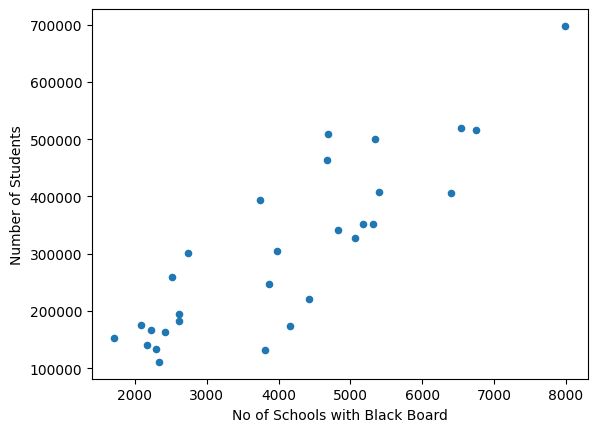

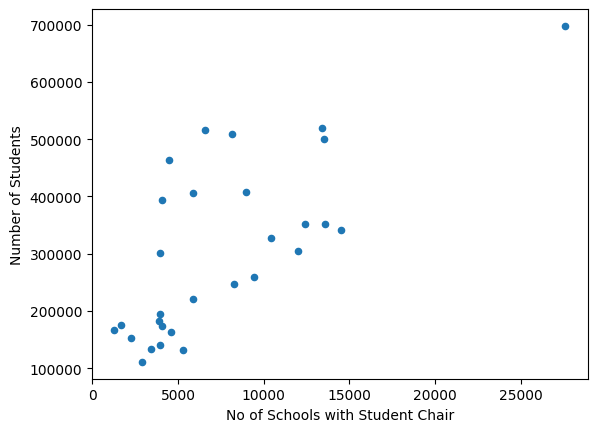

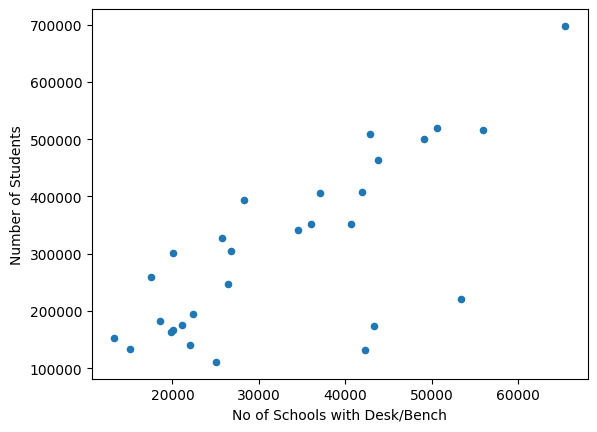

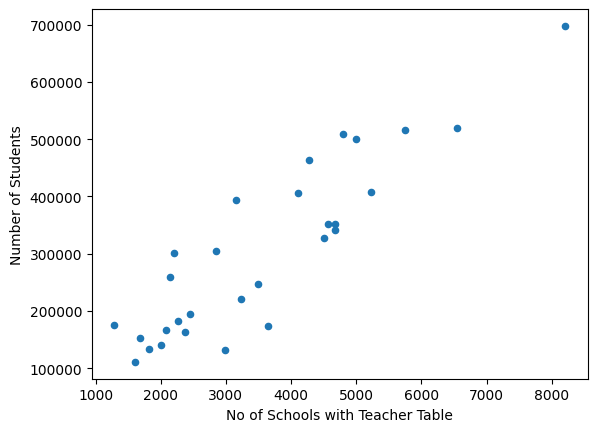

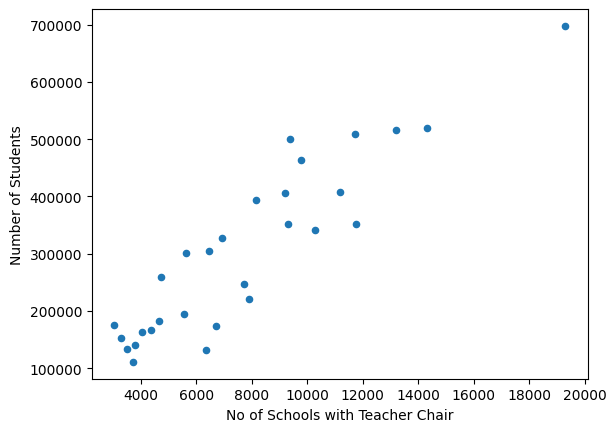

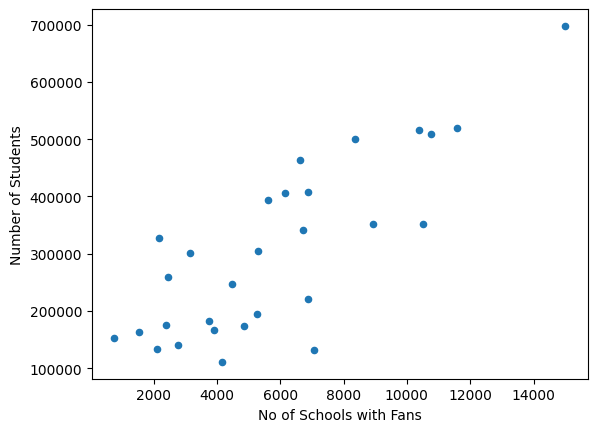

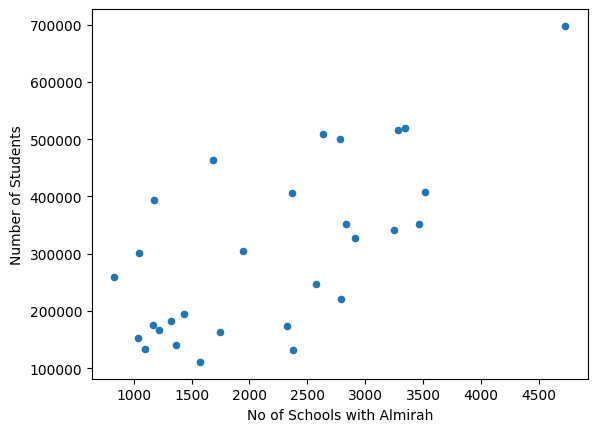

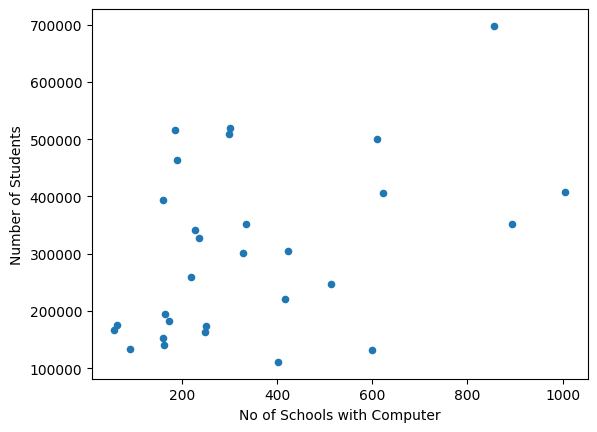

In [140]:
cols=facilities.columns
comparison =["Number of Students"]
print(cols)
for i in range(0,len(cols)):
  for j in range(0,len(comparison)):
    if cols[i]=="District" or cols[i]=="No.of Schools":
      continue
    if cols[i] in comparison:
      continue
    ax2 = facilities.plot.scatter(x=cols[i],  y=comparison[j],  colormap='viridis');
    temp=cols[i].split()
    if ("With") in temp:
      if len(temp)==2:
        title="No of Schools"+" "+temp[1]+" "+temp[0]
        plt.xlabel(title)
      else:
        title="No of Schools"+" "+temp[2]+" "+temp[0]+" "+temp[1]
        plt.xlabel(title)
    elif ("Without") in temp:
      if len(temp)==2:
        title="No of Schools"+" "+temp[1]+" "+temp[0]
        plt.xlabel(title)
      else:
        title="No of Schools"+" "+temp[2]+" "+temp[0]+" "+temp[1]
        plt.xlabel(title)
    else:
      title="No of Schools with "+cols[i]
      plt.xlabel(title)

    